In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import os

# Relative paths to the files
turbine_path = 'A1-turbine.txt'
synthetic_path = 'A1-synthetic.txt'
real_estate_path = 'Real_estate.csv'

for path in [turbine_path, synthetic_path, real_estate_path]:
    if not os.path.exists(path):
        print(f"File not found: {path}")
    else:
        print(f"File found: {path}")
try:
    turbine_data = pd.read_csv(turbine_path, sep='\t')
    print("Turbine data loaded successfully.")
except FileNotFoundError as e:
    print(f"Error loading turbine data: {e}")

try:
    synthetic_data = pd.read_csv(synthetic_path, sep='\t')
    print("Synthetic data loaded successfully.")
except FileNotFoundError as e:
    print(f"Error loading synthetic data: {e}")

try:
    real_estate_data = pd.read_csv(real_estate_path)
    print("Real estate data loaded successfully.")
except FileNotFoundError as e:
    print(f"Error loading real estate data: {e}")

# Function to normalize dataset
def normalize_dataset(df, input_columns, output_column, output_range=(0.1, 0.9)):
    # Normalize input columns to [0, 1]
    scaler_in = MinMaxScaler()
    df[input_columns] = scaler_in.fit_transform(df[input_columns])
   
    # Normalize output column to [0.1, 0.9]
    scaler_out = MinMaxScaler(feature_range=output_range)
    df[output_column] = scaler_out.fit_transform(df[[output_column]])
   
    return df
   
if 'turbine_data' in locals():
    turbine_input_columns = turbine_data.columns[:-1]
    turbine_output_column = turbine_data.columns[-1]
    turbine_data_normalized = normalize_dataset(turbine_data, turbine_input_columns, turbine_output_column)
    turbine_data_normalized.to_csv('turbine_data_normalized.csv', index=False)

if 'synthetic_data' in locals():
    synthetic_input_columns = synthetic_data.columns[:-1]
    synthetic_output_column = synthetic_data.columns[-1]
    synthetic_data_normalized = normalize_dataset(synthetic_data, synthetic_input_columns, synthetic_output_column)
    synthetic_data_normalized.to_csv('synthetic_data_normalized.csv', index=False)

if 'real_estate_data' in locals():
    real_estate_input_columns = real_estate_data.columns[:-1]
    real_estate_output_column = real_estate_data.columns[-1]
    real_estate_data_normalized = normalize_dataset(real_estate_data, real_estate_input_columns, real_estate_output_column)
    real_estate_data_normalized.to_csv('real_estate_data_normalized.csv', index=False)

if 'turbine_data' in locals():
    print("Turbine Data Description:\n", turbine_data.describe())

if 'synthetic_data' in locals():
    print("Synthetic Data Description:\n", synthetic_data.describe())

if 'real_estate_data' in locals():
    print("Real Estate Data Description:\n", real_estate_data.describe())

File found: A1-turbine.txt
File found: A1-synthetic.txt
File found: Real_estate.csv
Turbine data loaded successfully.
Synthetic data loaded successfully.
Real estate data loaded successfully.
Turbine Data Description:
        #height_over_sea_level        fall    net_fall        flow  \
count              451.000000  451.000000  451.000000  451.000000   
mean                 0.535221    0.516428    0.523289    0.486881   
std                  0.284316    0.272581    0.271365    0.297153   
min                  0.000000    0.000000    0.000000    0.000000   
25%                  0.307692    0.306317    0.302427    0.250000   
50%                  0.538462    0.508625    0.521510    0.500000   
75%                  0.794872    0.757864    0.760816    0.750000   
max                  1.000000    1.000000    1.000000    1.000000   

       power_of_hydroelectrical_turbine  
count                        451.000000  
mean                           0.414107  
std                            0.

MAPE for MyNeuralNetwork on Turbine data: 0.1487932933750187


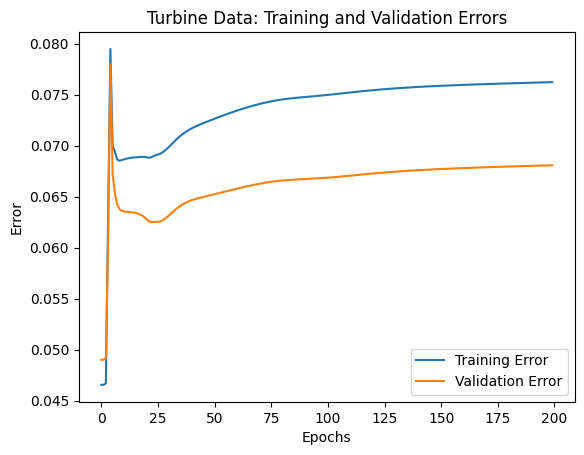

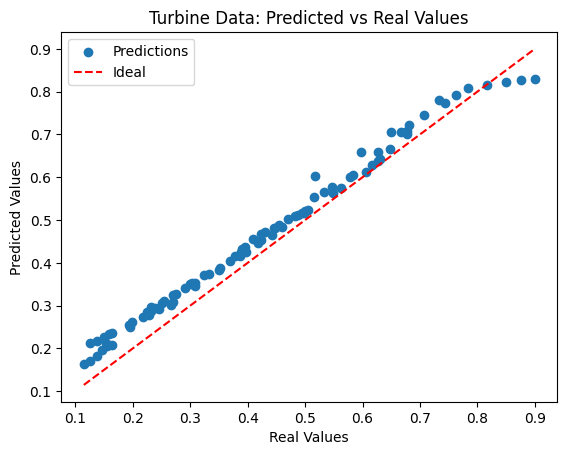

MAPE for MyNeuralNetwork on Synthetic data: 0.0851206746610221


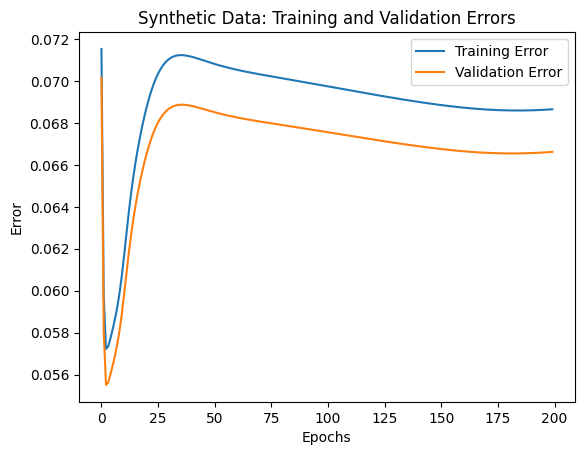

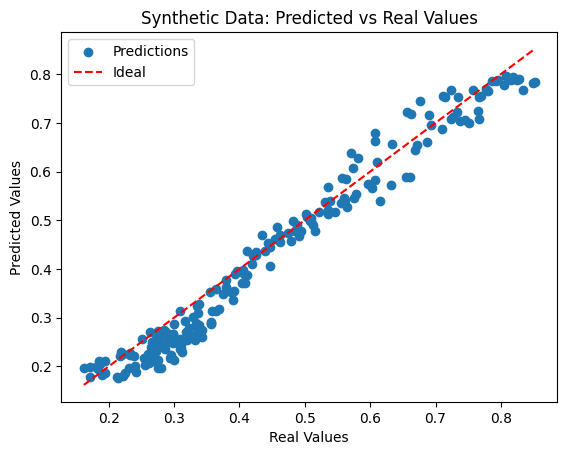

MAPE for MyNeuralNetwork on Real Estate data: 0.4921222467144028


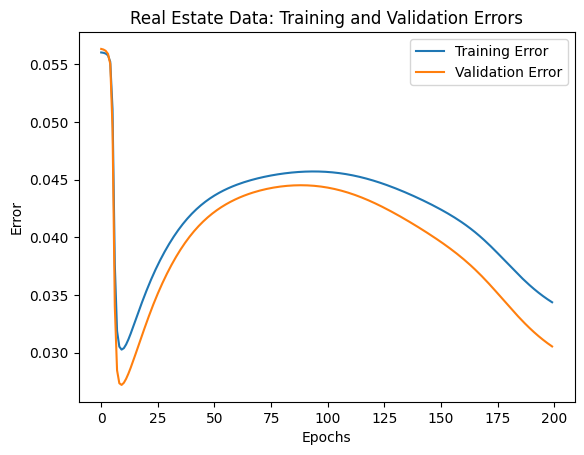

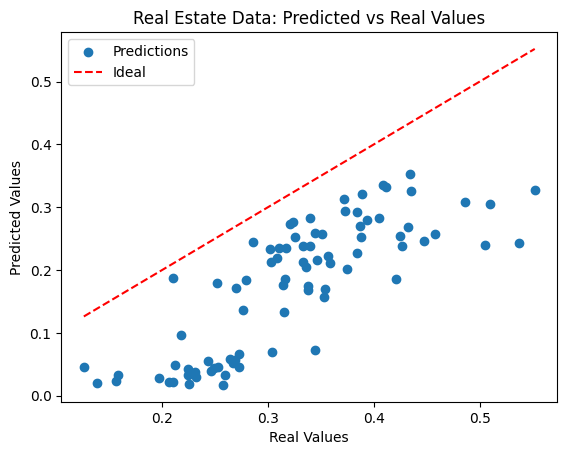

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

class MyNeuralNetwork:
    def __init__(self, num_layers, num_units, num_epochs, learning_rate, momentum, activation_function, validation_percentage):
        self.L = num_layers
        self.n = num_units
        self.num_epochs = num_epochs
        self.eta = learning_rate
        self.alpha = momentum
        self.fact = activation_function
        self.validation_percentage = validation_percentage
        self.xi = [np.zeros(layer_units) for layer_units in num_units]
        self.h = [np.zeros(layer_units) for layer_units in num_units]
        self.w = [None] + [np.random.randn(num_units[i], num_units[i - 1]) * 0.1 for i in range(1, num_layers)]
        self.theta = [np.zeros(layer_units) for layer_units in num_units]
        self.delta = [np.zeros(layer_units) for layer_units in num_units]
        self.d_w = [None] + [np.zeros((num_units[i], num_units[i - 1])) for i in range(1, num_layers)]
        self.d_theta = [np.zeros(layer_units) for layer_units in num_units]
        self.d_w_prev = [None] + [np.zeros((num_units[i], num_units[i - 1])) for i in range(1, num_layers)]
        self.d_theta_prev = [np.zeros(layer_units) for layer_units in num_units]
        self.training_error = []
        self.validation_error = []

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return (x > 0).astype(float)

    def linear(self, x):
        return x

    def linear_derivative(self, x):
        return np.ones_like(x)

    def tanh(self, x):
        return np.tanh(x)

    def tanh_derivative(self, x):
        return 1 - x**2

    def activation(self, x):
        if self.fact == 'sigmoid':
            return self.sigmoid(x)
        elif self.fact == 'relu':
            return self.relu(x)
        elif self.fact == 'linear':
            return self.linear(x)
        elif self.fact == 'tanh':
            return self.tanh(x)

    def activation_derivative(self, x):
        if self.fact == 'sigmoid':
            return self.sigmoid_derivative(x)
        elif self.fact == 'relu':
            return self.relu_derivative(x)
        elif self.fact == 'linear':
            return self.linear_derivative(x)
        elif self.fact == 'tanh':
            return self.tanh_derivative(x)

    def forward_propagation(self, x):
        self.xi[0] = x
        for l in range(1, self.L):
            self.h[l] = np.dot(self.w[l], self.xi[l - 1]) + self.theta[l]
            self.xi[l] = self.activation(self.h[l])
        return self.xi[-1]

    def backward_propagation(self, y):
        self.delta[-1] = (self.xi[-1] - y) * self.activation_derivative(self.xi[-1])
        for l in range(self.L - 2, 0, -1):
            self.delta[l] = np.dot(self.w[l + 1].T, self.delta[l + 1]) * self.activation_derivative(self.xi[l])
        for l in range(1, self.L):
            self.d_w[l] = np.outer(self.delta[l], self.xi[l - 1])
            self.d_theta[l] = self.delta[l]

    def update_weights(self):
        for l in range(1, self.L):
            self.w[l] -= self.eta * self.d_w[l] + self.alpha * self.d_w_prev[l]
            self.theta[l] -= self.eta * self.d_theta[l] + self.alpha * self.d_theta_prev[l]
            self.d_w_prev[l] = self.d_w[l]
            self.d_theta_prev[l] = self.d_theta[l]

    def train(self, X, y):
        for epoch in range(self.num_epochs):
            for i in range(len(X)):
                self.forward_propagation(X[i])
                self.backward_propagation(y[i])
                self.update_weights()
            training_loss = np.mean((self.predict(X) - y) ** 2)
            self.training_error.append(training_loss)
            if self.validation_percentage > 0:
                validation_size = int(len(X) * self.validation_percentage)
                X_val, y_val = X[:validation_size], y[:validation_size]
                validation_loss = np.mean((self.predict(X_val) - y_val) ** 2)
                self.validation_error.append(validation_loss)

    def predict(self, X):
        predictions = []
        for i in range(len(X)):
            predictions.append(self.forward_propagation(X[i]))
        return np.array(predictions)

    def loss_epochs(self):
        return np.array([self.training_error, self.validation_error]).T

# Training, evaluation, and plotting code
def main():
    # Load normalized datasets
    turbine_data = pd.read_csv('turbine_data_normalized.csv')
    synthetic_data = pd.read_csv('synthetic_data_normalized.csv')
    real_estate_data = pd.read_csv('real_estate_data_normalized.csv')

    # Function to split data
    def split_data(df, target_column, test_size=0.2):
        train_size = int(len(df) * (1 - test_size))
        train_df = df[:train_size]
        test_df = df[train_size:]
        X_train, y_train = train_df.drop(columns=[target_column]), train_df[target_column]
        X_test, y_test = test_df.drop(columns=[target_column]), test_df[target_column]
        return X_train, X_test, y_train, y_test

    # Split datasets
    X_train_turbine, X_test_turbine, y_train_turbine, y_test_turbine = split_data(turbine_data, 'power_of_hydroelectrical_turbine')
    X_train_synthetic, X_test_synthetic, y_train_synthetic, y_test_synthetic = split_data(synthetic_data, 'z')
    X_train_real_estate, X_test_real_estate, y_train_real_estate, y_test_real_estate = split_data(real_estate_data, 'Y house price of unit area')

    # Function to train and evaluate model
    def evaluate_nn_model(name, X_train, y_train, X_test, y_test):
        nn = MyNeuralNetwork(num_layers=5, num_units=[X_train.shape[1], 9, 7, 5, 1], num_epochs=200, learning_rate=0.01, momentum=0.9, activation_function='tanh', validation_percentage=0.2)
        nn.train(X_train.to_numpy(), y_train.to_numpy())
        nn_predictions = nn.predict(X_test.to_numpy())
        mape_nn = mean_absolute_percentage_error(y_test, nn_predictions)
        print(f"MAPE for MyNeuralNetwork on {name} data: {mape_nn}")

        # Plot training and validation errors
        errors = nn.loss_epochs()
        plt.plot(errors[:, 0], label='Training Error')
        plt.plot(errors[:, 1], label='Validation Error')
        plt.xlabel('Epochs')
        plt.ylabel('Error')
        plt.title(f'{name} Data: Training and Validation Errors')
        plt.legend()
        plt.show()

        # Scatter plot of predicted vs real values
        plt.scatter(y_test, nn_predictions, label='Predictions')
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Ideal')
        plt.xlabel('Real Values')
        plt.ylabel('Predicted Values')
        plt.title(f'{name} Data: Predicted vs Real Values')
        plt.legend()
        plt.show()

        return nn_predictions, mape_nn

    # Evaluate model on all datasets
    datasets = [
        ('Turbine', X_train_turbine, y_train_turbine, X_test_turbine, y_test_turbine),
        ('Synthetic', X_train_synthetic, y_train_synthetic, X_test_synthetic, y_test_synthetic),
        ('Real Estate', X_train_real_estate, y_train_real_estate, X_test_real_estate, y_test_real_estate)
    ]

    for name, X_train, y_train, X_test, y_test in datasets:
        predictions, mape = evaluate_nn_model(name, X_train, y_train, X_test, y_test)

if __name__ == "__main__":
    main()


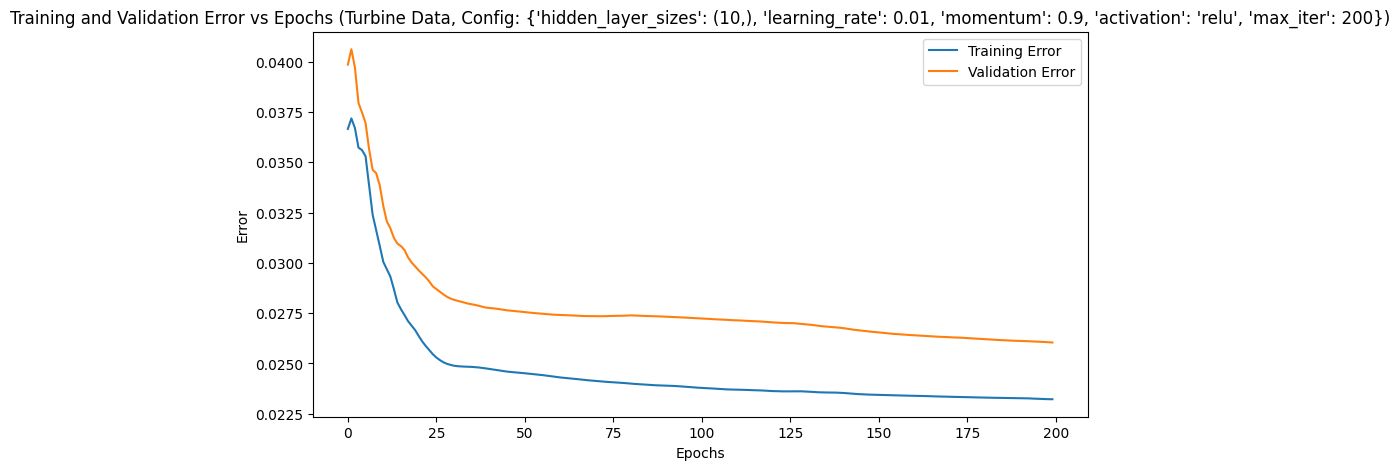

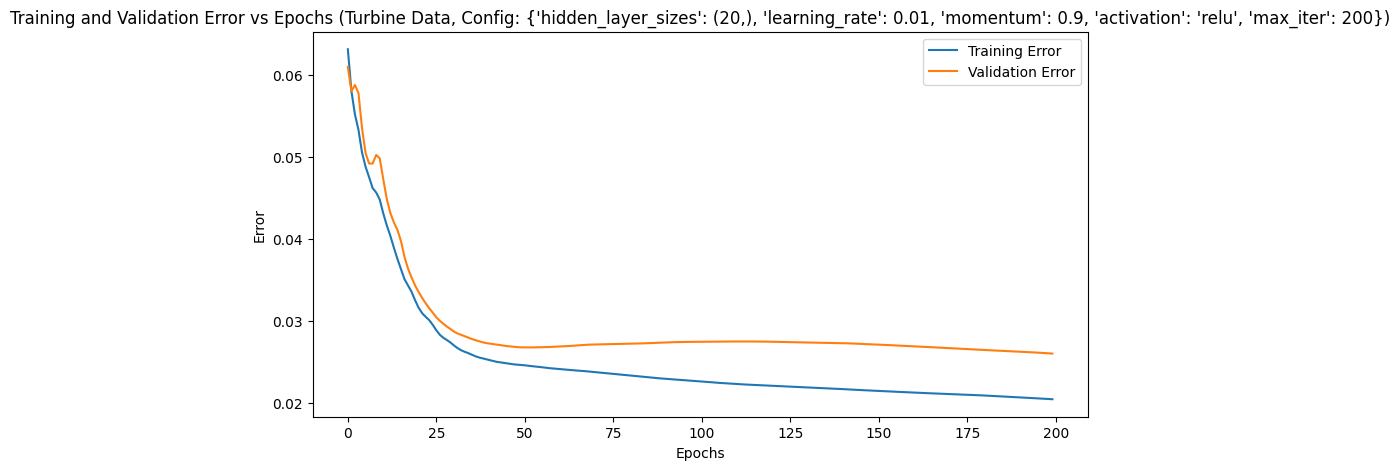

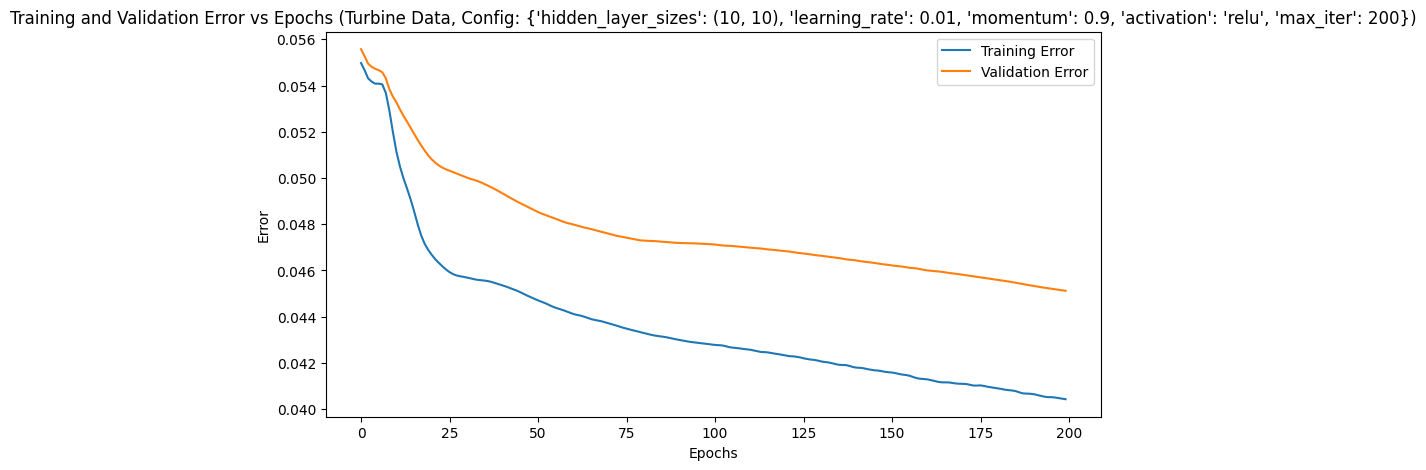

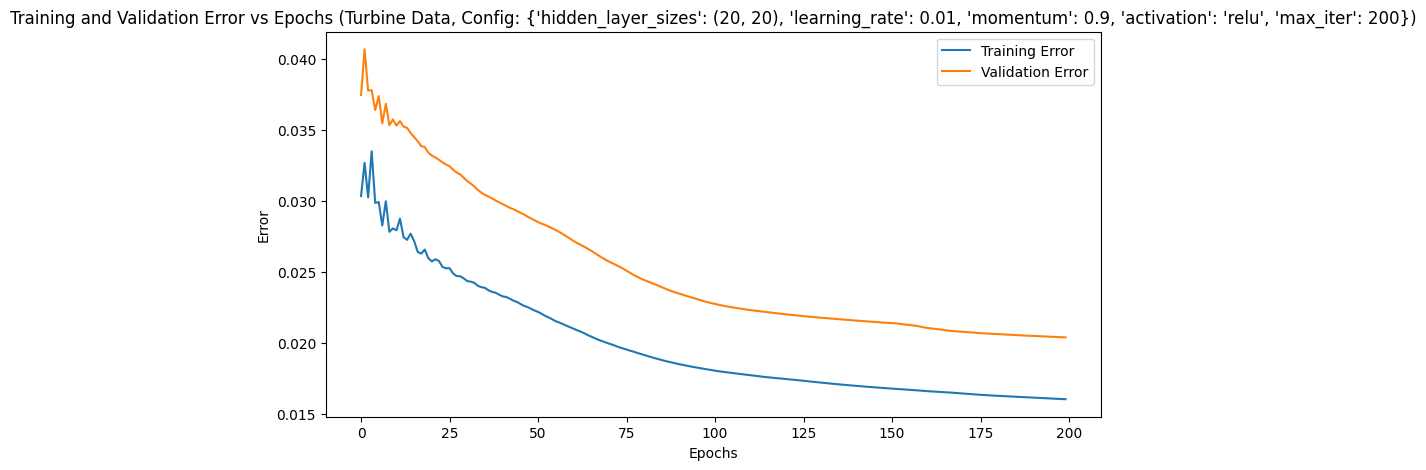

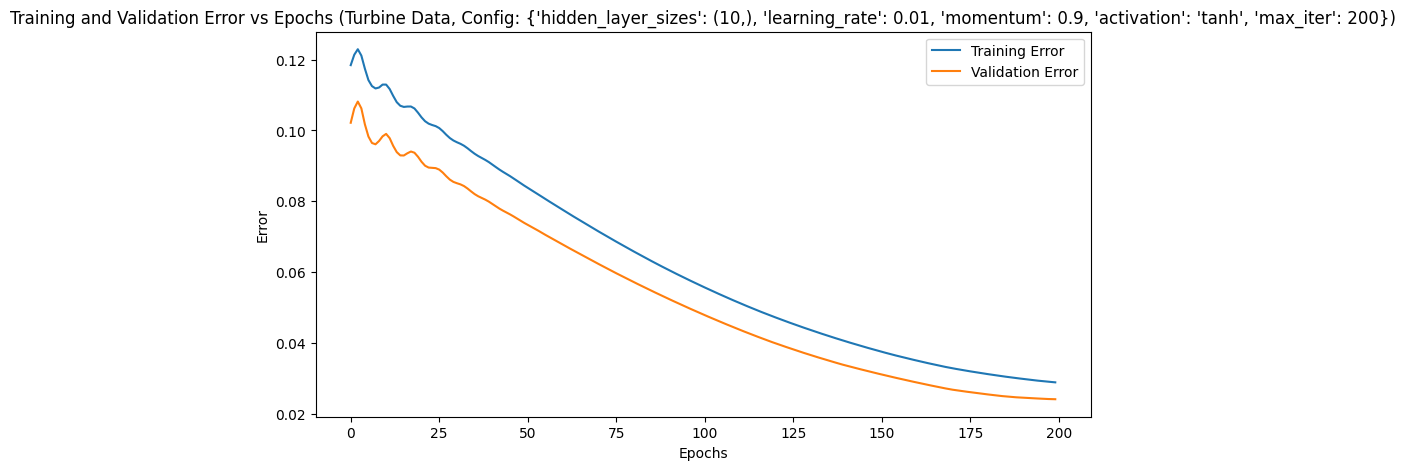

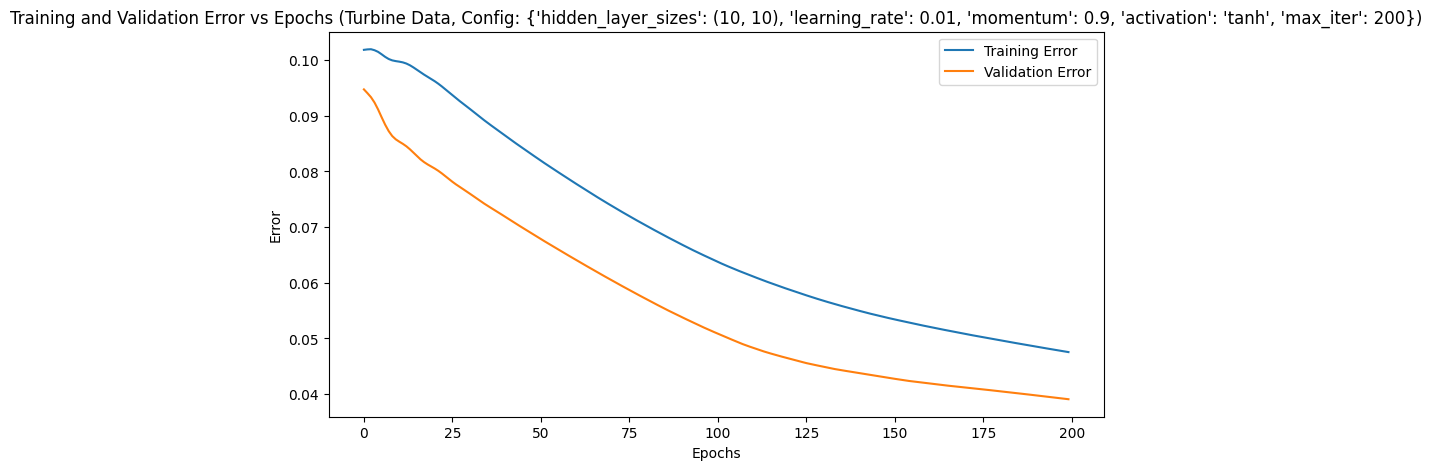

Turbine Data Results:
  model                                             config      MAPE
0    NN  {'hidden_layer_sizes': (10,), 'learning_rate':...  0.033069
1    NN  {'hidden_layer_sizes': (20,), 'learning_rate':...  0.057950
2    NN  {'hidden_layer_sizes': (10, 10), 'learning_rat...  0.048220
3    NN  {'hidden_layer_sizes': (20, 20), 'learning_rat...  0.028914
4    NN  {'hidden_layer_sizes': (10,), 'learning_rate':...  0.097612
5    NN  {'hidden_layer_sizes': (10, 10), 'learning_rat...  0.093542
6   MLR                                                 {}  0.068052


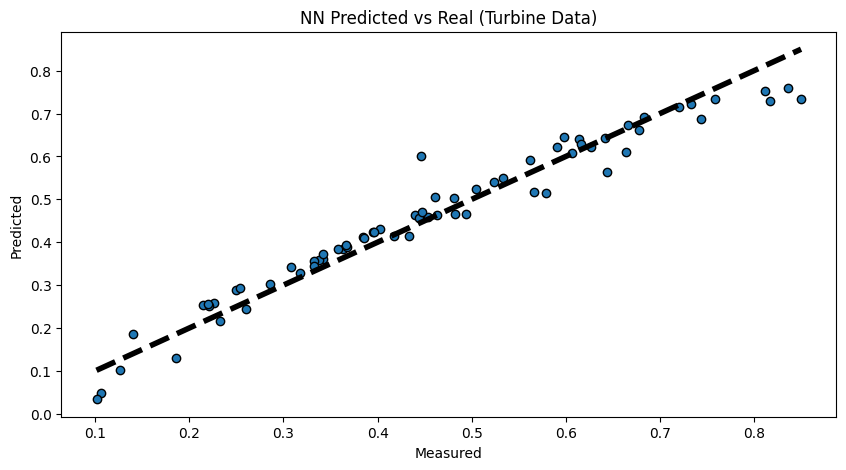

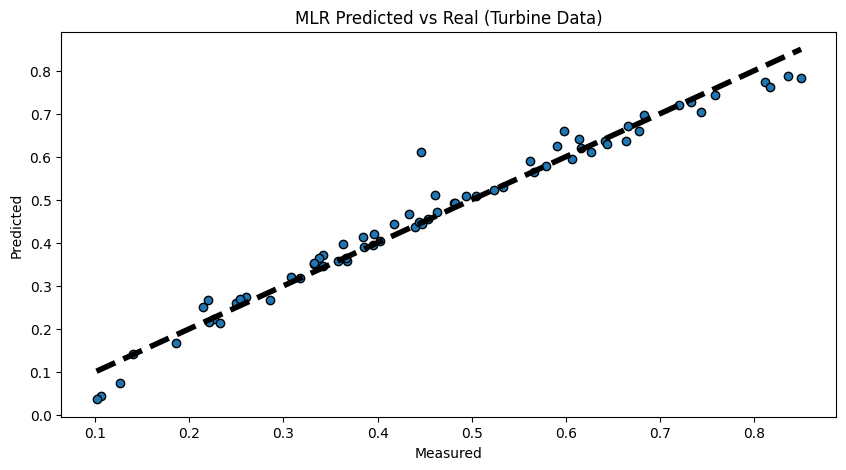

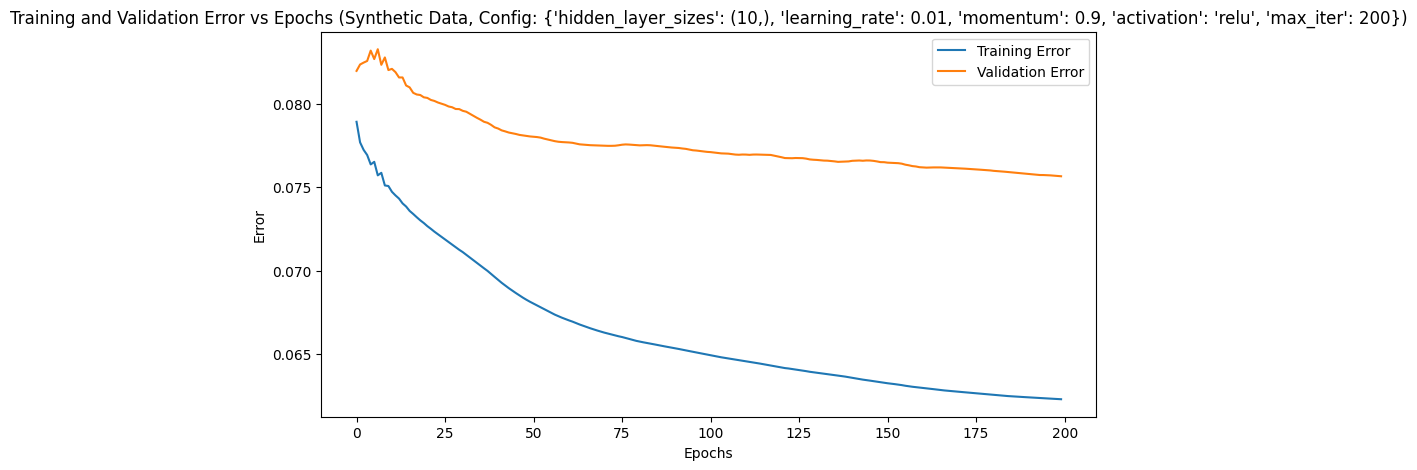

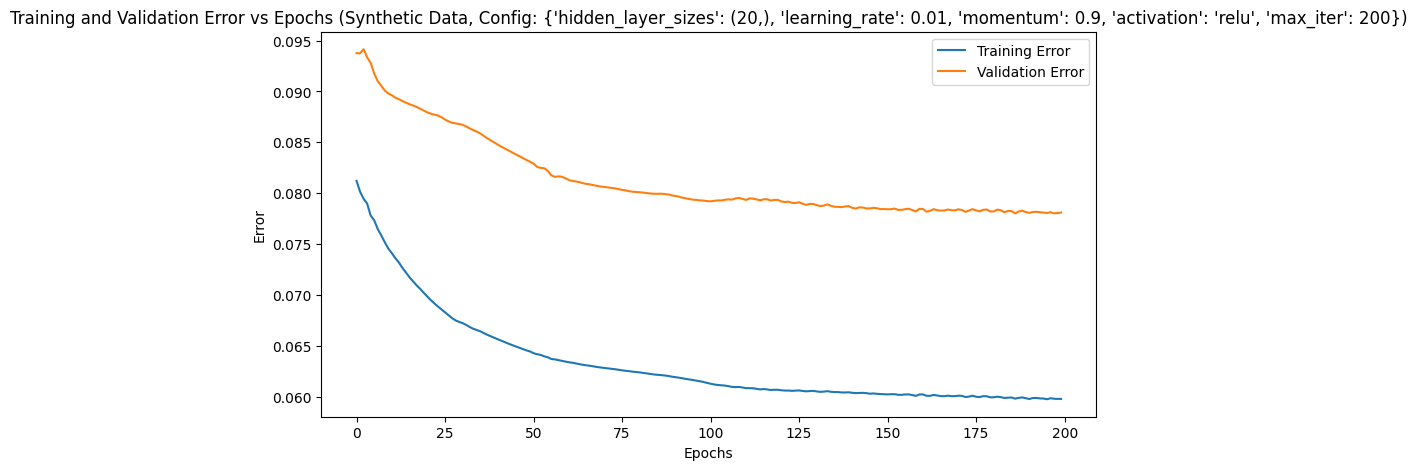

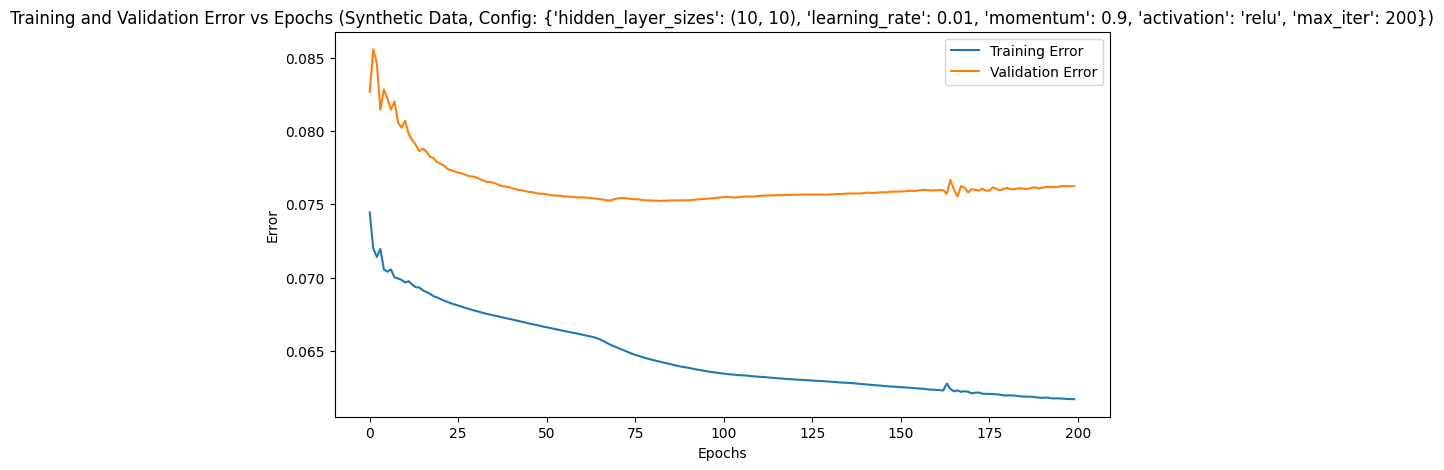

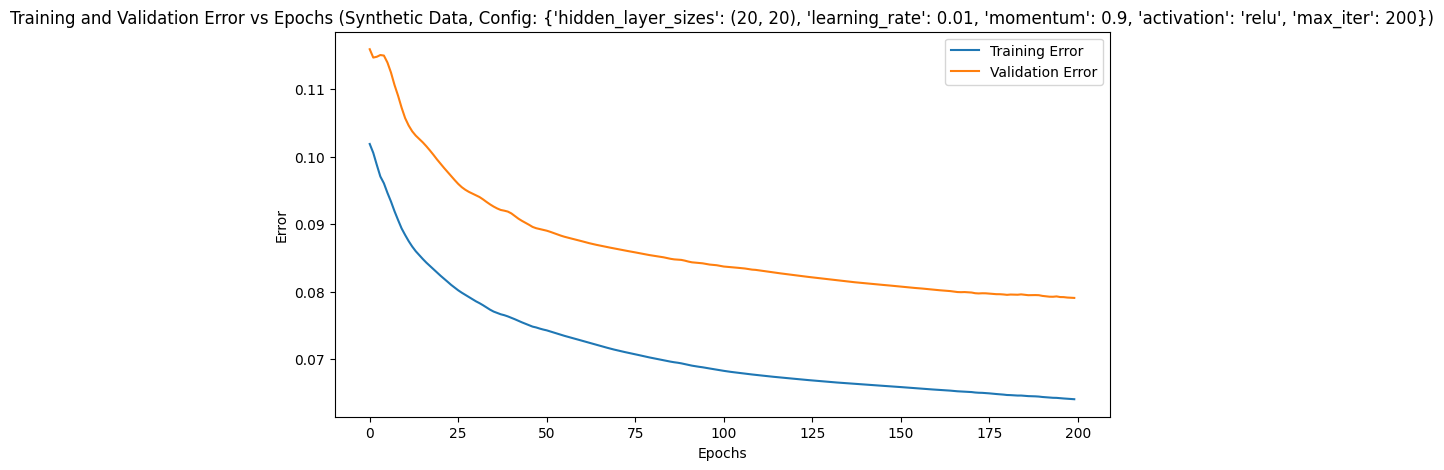

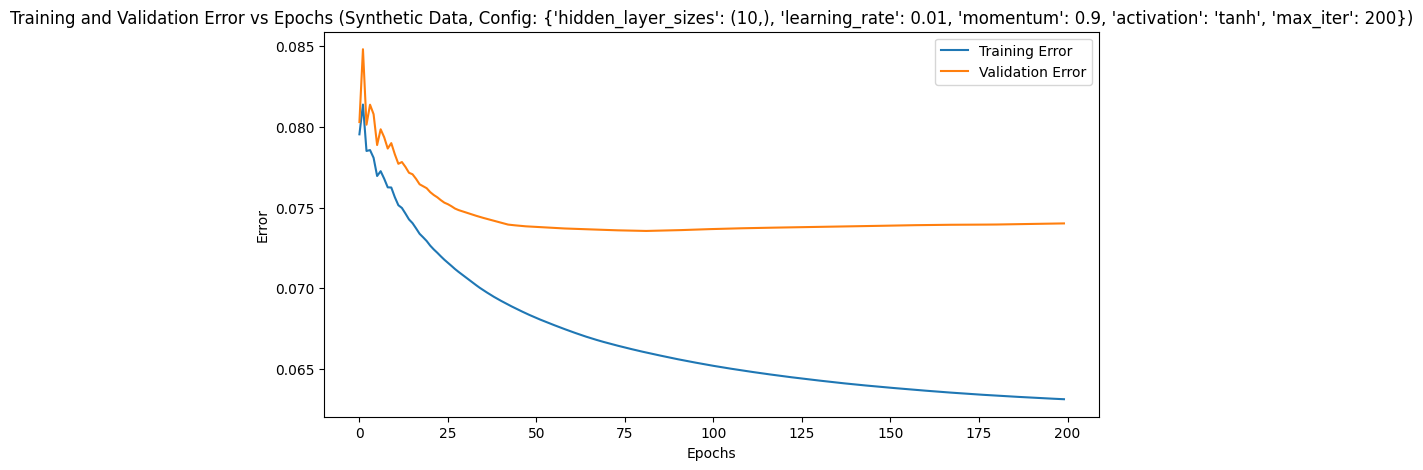

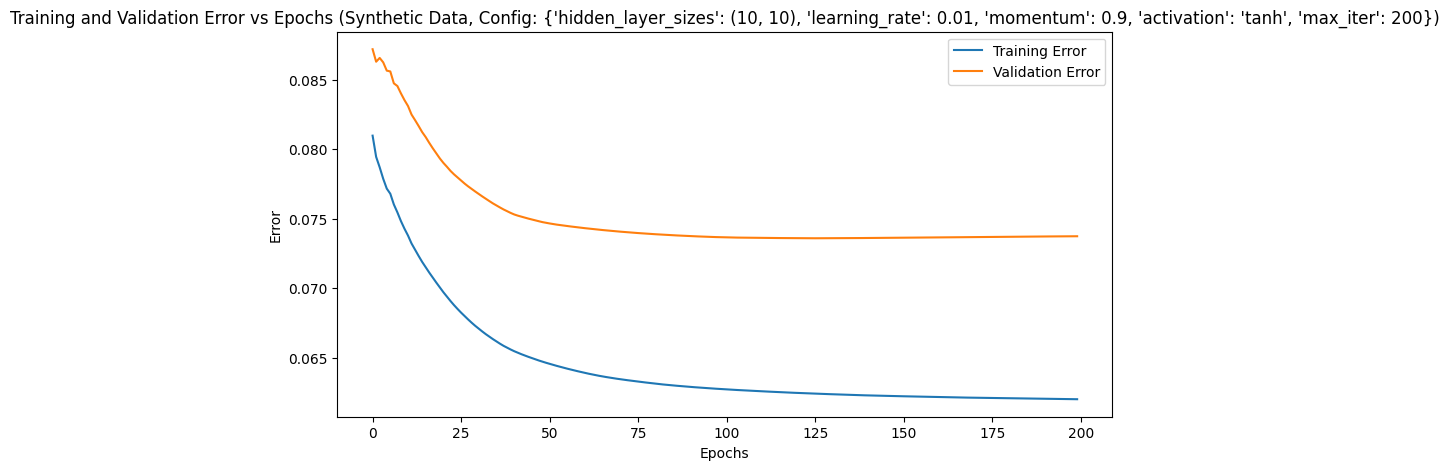

Synthetic Data Results:
  model                                             config      MAPE
0    NN  {'hidden_layer_sizes': (10,), 'learning_rate':...  0.073649
1    NN  {'hidden_layer_sizes': (20,), 'learning_rate':...  0.098166
2    NN  {'hidden_layer_sizes': (10, 10), 'learning_rat...  0.078802
3    NN  {'hidden_layer_sizes': (20, 20), 'learning_rat...  0.097008
4    NN  {'hidden_layer_sizes': (10,), 'learning_rate':...  0.079252
5    NN  {'hidden_layer_sizes': (10, 10), 'learning_rat...  0.083547
6   MLR                                                 {}  0.065190


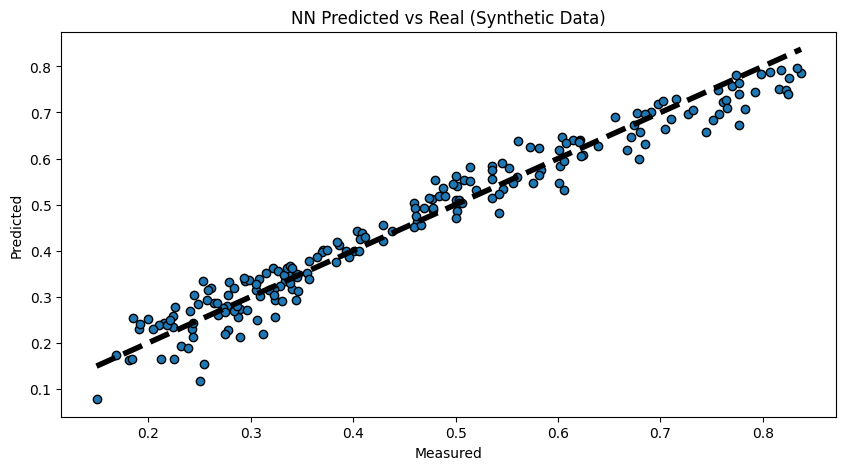

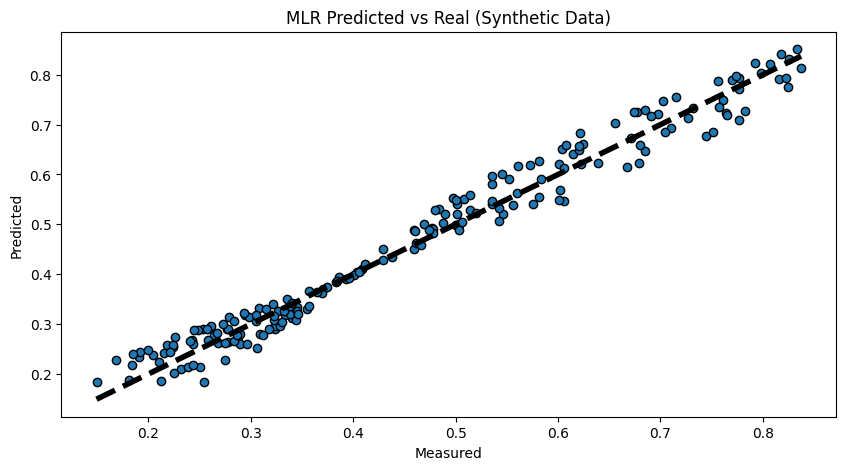

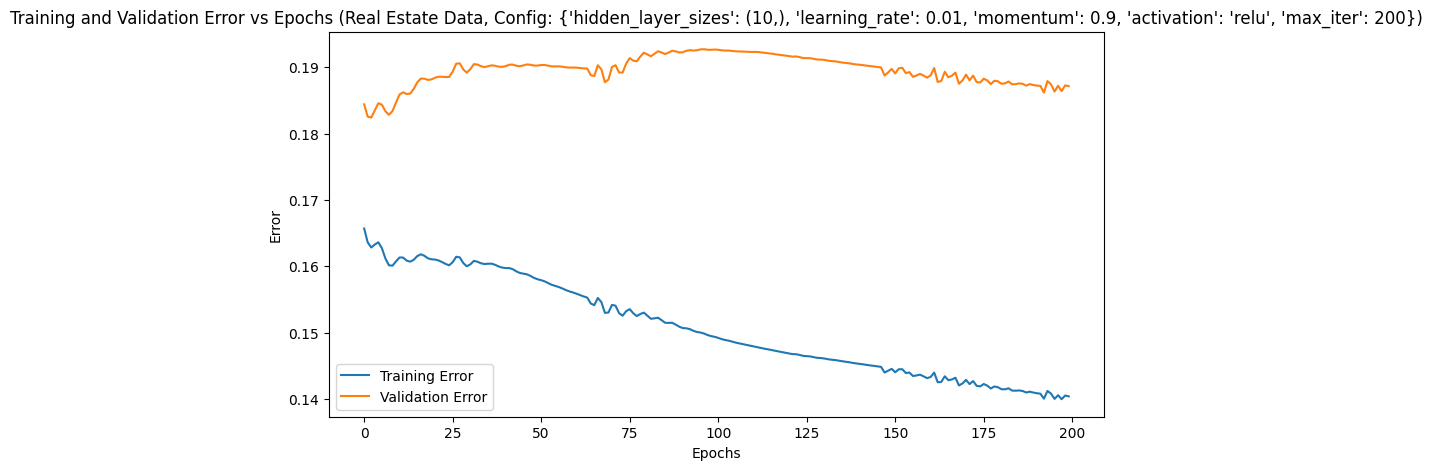

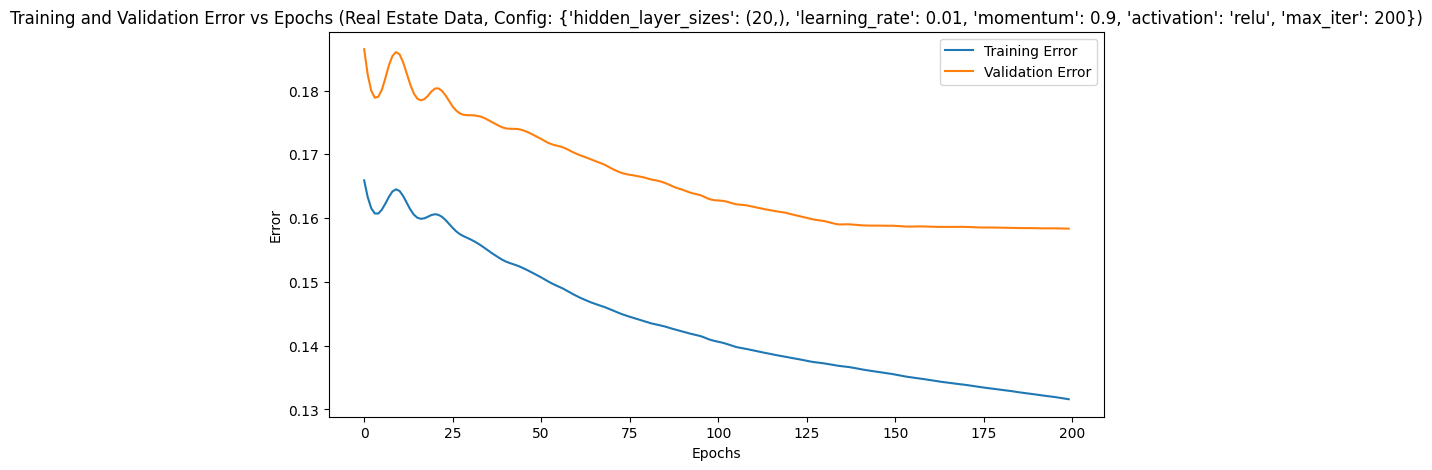

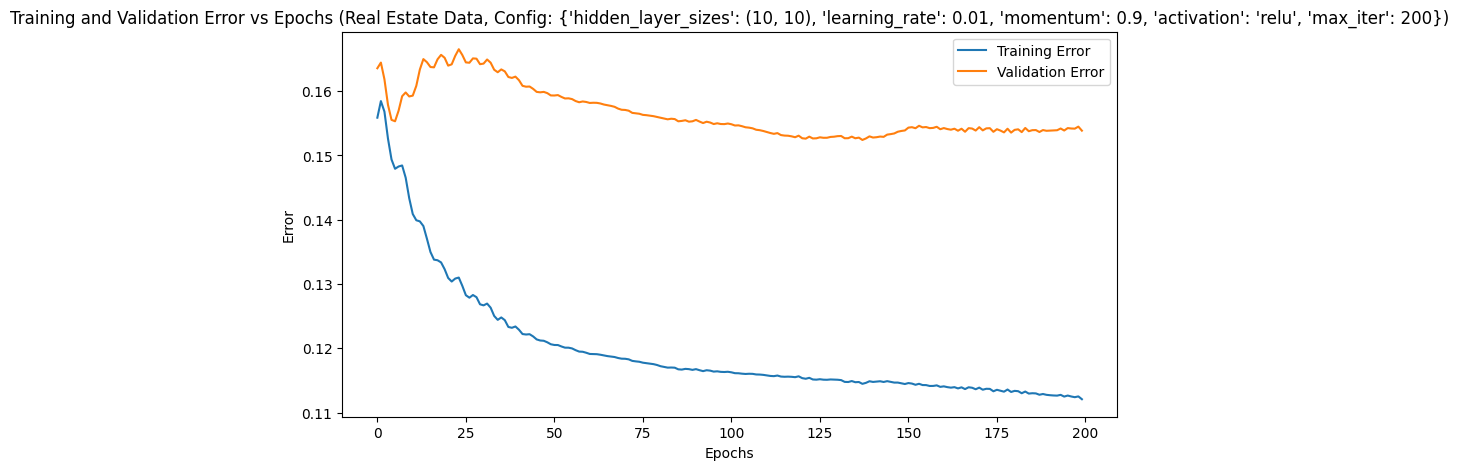

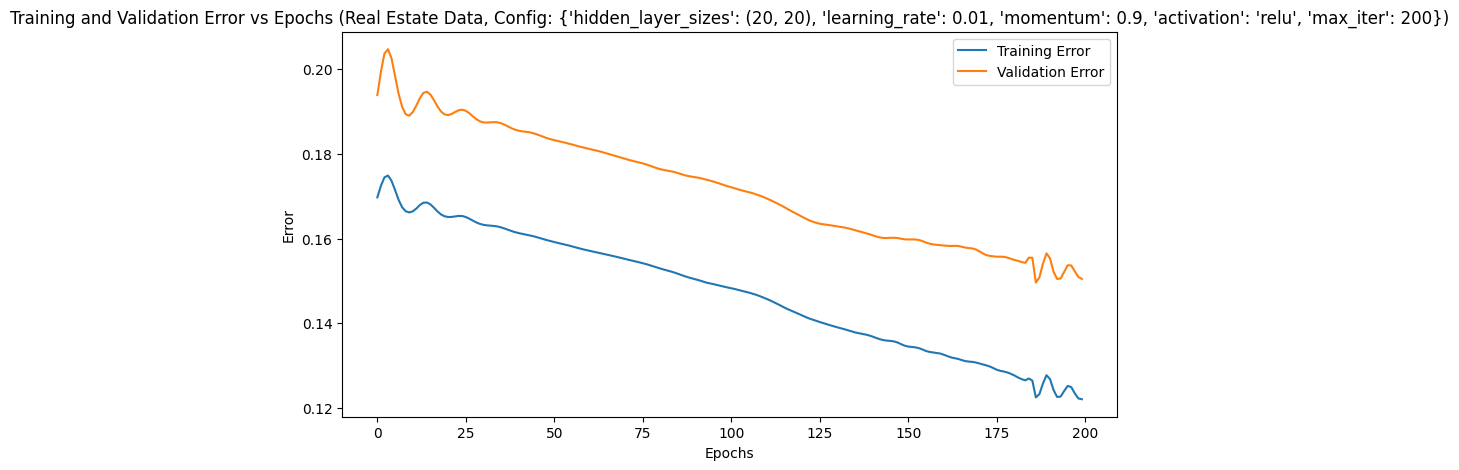

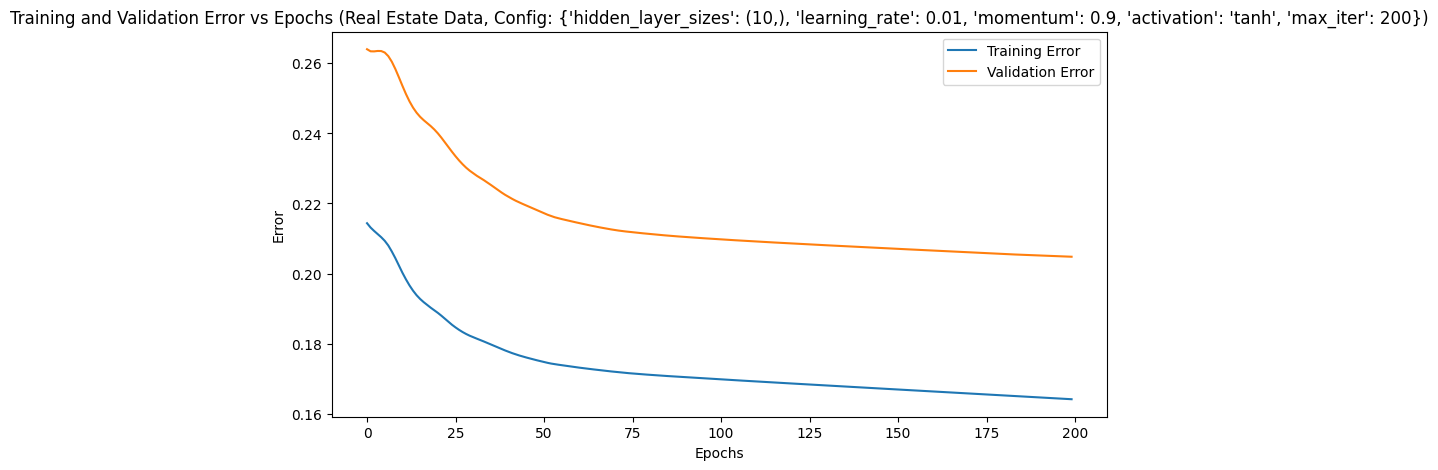

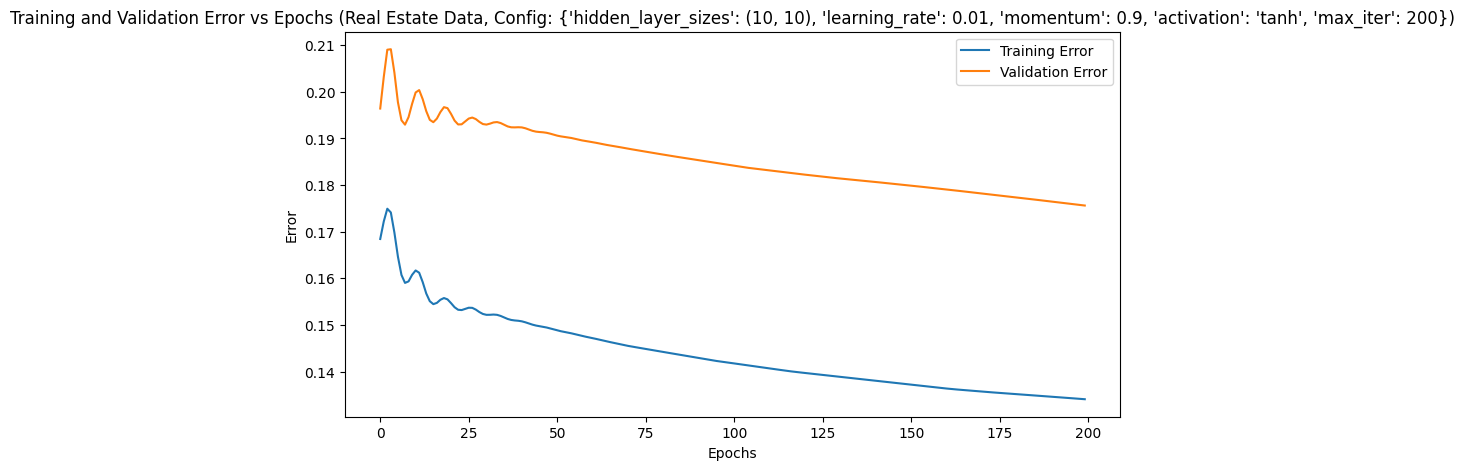

Real Estate Data Results:
  model                                             config      MAPE
0    NN  {'hidden_layer_sizes': (10,), 'learning_rate':...  0.158604
1    NN  {'hidden_layer_sizes': (20,), 'learning_rate':...  0.153388
2    NN  {'hidden_layer_sizes': (10, 10), 'learning_rat...  0.152952
3    NN  {'hidden_layer_sizes': (20, 20), 'learning_rat...  0.172162
4    NN  {'hidden_layer_sizes': (10,), 'learning_rate':...  0.231005
5    NN  {'hidden_layer_sizes': (10, 10), 'learning_rat...  0.144764
6   MLR                                                 {}  0.142654


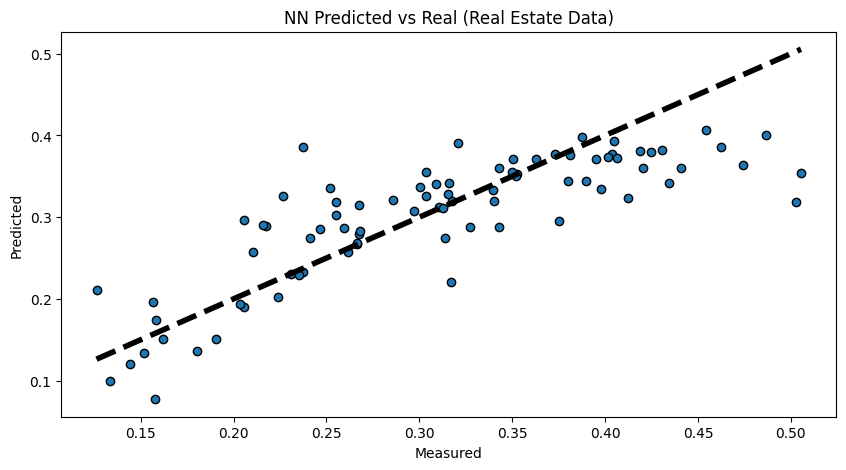

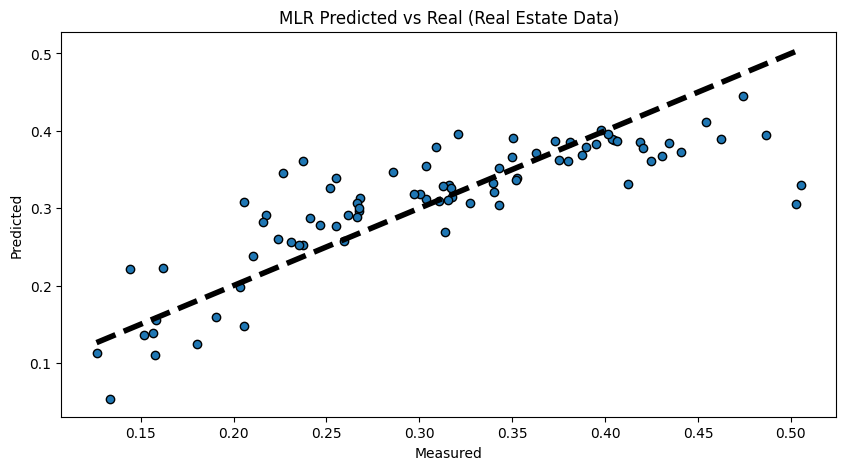


Part 3.1 Summary

Turbine Data Results:
  model                                             config      MAPE
0    NN  {'hidden_layer_sizes': (10,), 'learning_rate':...  0.033069
1    NN  {'hidden_layer_sizes': (20,), 'learning_rate':...  0.057950
2    NN  {'hidden_layer_sizes': (10, 10), 'learning_rat...  0.048220
3    NN  {'hidden_layer_sizes': (20, 20), 'learning_rat...  0.028914
4    NN  {'hidden_layer_sizes': (10,), 'learning_rate':...  0.097612
5    NN  {'hidden_layer_sizes': (10, 10), 'learning_rat...  0.093542
6   MLR                                                 {}  0.068052

Synthetic Data Results:
  model                                             config      MAPE
0    NN  {'hidden_layer_sizes': (10,), 'learning_rate':...  0.073649
1    NN  {'hidden_layer_sizes': (20,), 'learning_rate':...  0.098166
2    NN  {'hidden_layer_sizes': (10, 10), 'learning_rat...  0.078802
3    NN  {'hidden_layer_sizes': (20, 20), 'learning_rat...  0.097008
4    NN  {'hidden_layer_sizes': (10,)

In [14]:
# Part 3.1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Load normalized datasets
turbine_data = pd.read_csv('turbine_data_normalized.csv')
synthetic_data = pd.read_csv('synthetic_data_normalized.csv')
real_estate_data = pd.read_csv('real_estate_data_normalized.csv')

def preprocess_data(data, target_column, test_size=0.2):
    X = data.drop(columns=[target_column])
    y = data[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, shuffle=True)
    return X_train, X_test, y_train, y_test

# Preprocess the data
X_train_turbine, X_test_turbine, y_train_turbine, y_test_turbine = preprocess_data(turbine_data, 'power_of_hydroelectrical_turbine', test_size=0.15)
X_train_synthetic, X_test_synthetic, y_train_synthetic, y_test_synthetic = preprocess_data(synthetic_data, 'z', test_size=0.2)
X_train_real, X_test_real, y_train_real, y_test_real = preprocess_data(real_estate_data, 'Y house price of unit area', test_size=0.2)

# Function to train and evaluate the neural network
def train_evaluate_nn(X_train, y_train, X_test, y_test, hidden_layer_sizes, learning_rate, momentum, activation, max_iter=200):
    model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, learning_rate_init=learning_rate, momentum=momentum, 
                         activation=activation, max_iter=max_iter, random_state=42, solver='adam')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    loss_train = model.loss_curve_
    return model, y_pred, mape, loss_train

# Function to train and evaluate multiple linear regression
def train_evaluate_mlr(X_train, y_train, X_test, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    return model, y_pred, mape

# Experiment with different configurations
configurations = [
    {'hidden_layer_sizes': (10,), 'learning_rate': 0.01, 'momentum': 0.9, 'activation': 'relu', 'max_iter': 200},
    {'hidden_layer_sizes': (20,), 'learning_rate': 0.01, 'momentum': 0.9, 'activation': 'relu', 'max_iter': 200},
    {'hidden_layer_sizes': (10, 10), 'learning_rate': 0.01, 'momentum': 0.9, 'activation': 'relu', 'max_iter': 200},
    {'hidden_layer_sizes': (20, 20), 'learning_rate': 0.01, 'momentum': 0.9, 'activation': 'relu', 'max_iter': 200},
    {'hidden_layer_sizes': (10,), 'learning_rate': 0.01, 'momentum': 0.9, 'activation': 'tanh', 'max_iter': 200},
    {'hidden_layer_sizes': (10, 10), 'learning_rate': 0.01, 'momentum': 0.9, 'activation': 'tanh', 'max_iter': 200},
]

# Function to plot results
def plot_results(y_test, y_pred, title):
    plt.figure(figsize=(10, 5))
    plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    plt.xlabel('Measured')
    plt.ylabel('Predicted')
    plt.title(title)
    plt.show()

# Function to plot training and validation errors
def plot_loss_epochs(loss_train, loss_val, title):
    plt.figure(figsize=(10, 5))
    plt.plot(loss_train, label='Training Error')
    plt.plot(loss_val, label='Validation Error')
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title(title)
    plt.legend()
    plt.show()

# Function to evaluate and get both training and validation errors for neural networks
def get_nn_errors(model, X_train, y_train, X_test, y_test):
    # Use 20% of training data as validation
    validation_split = 0.2
    val_size = int(len(X_train) * validation_split)
    X_val, y_val = X_train[:val_size], y_train[:val_size]
    X_train, y_train = X_train[val_size:], y_train[val_size:]

    train_errors, val_errors = [], []
    for epoch in range(model.max_iter):
        model.partial_fit(X_train, y_train)
        train_pred = model.predict(X_train)
        val_pred = model.predict(X_val)
        train_errors.append(mean_absolute_percentage_error(y_train, train_pred))
        val_errors.append(mean_absolute_percentage_error(y_val, val_pred))

    return train_errors, val_errors

# Run experiments and record results for Turbine data
results_turbine = []

for config in configurations:
    nn_model, nn_pred, nn_mape, loss_train = train_evaluate_nn(X_train_turbine, y_train_turbine, X_test_turbine, y_test_turbine,
                                                               config['hidden_layer_sizes'], config['learning_rate'], 
                                                               config['momentum'], config['activation'], config['max_iter'])
    train_errors, val_errors = get_nn_errors(nn_model, X_train_turbine, y_train_turbine, X_test_turbine, y_test_turbine)
    results_turbine.append({'model': 'NN', 'config': config, 'MAPE': nn_mape})
    plot_loss_epochs(train_errors, val_errors, f'Training and Validation Error vs Epochs (Turbine Data, Config: {config})')

mlr_model, mlr_pred, mlr_mape = train_evaluate_mlr(X_train_turbine, y_train_turbine, X_test_turbine, y_test_turbine)
results_turbine.append({'model': 'MLR', 'config': {}, 'MAPE': mlr_mape})

# Display results for Turbine data
results_df_turbine = pd.DataFrame(results_turbine)
print("Turbine Data Results:")
print(results_df_turbine)

# Plot results for Turbine data
plot_results(y_test_turbine, nn_pred, 'NN Predicted vs Real (Turbine Data)')
plot_results(y_test_turbine, mlr_pred, 'MLR Predicted vs Real (Turbine Data)')

# Run experiments and record results for Synthetic data
results_synthetic = []

for config in configurations:
    nn_model, nn_pred, nn_mape, loss_train = train_evaluate_nn(X_train_synthetic, y_train_synthetic, X_test_synthetic, y_test_synthetic,
                                                               config['hidden_layer_sizes'], config['learning_rate'], 
                                                               config['momentum'], config['activation'], config['max_iter'])
    train_errors, val_errors = get_nn_errors(nn_model, X_train_synthetic, y_train_synthetic, X_test_synthetic, y_test_synthetic)
    results_synthetic.append({'model': 'NN', 'config': config, 'MAPE': nn_mape})
    plot_loss_epochs(train_errors, val_errors, f'Training and Validation Error vs Epochs (Synthetic Data, Config: {config})')

mlr_model, mlr_pred, mlr_mape = train_evaluate_mlr(X_train_synthetic, y_train_synthetic, X_test_synthetic, y_test_synthetic)
results_synthetic.append({'model': 'MLR', 'config': {}, 'MAPE': mlr_mape})

# Display results for Synthetic data
results_df_synthetic = pd.DataFrame(results_synthetic)
print("Synthetic Data Results:")
print(results_df_synthetic)

# Plot results for Synthetic data
plot_results(y_test_synthetic, nn_pred, 'NN Predicted vs Real (Synthetic Data)')
plot_results(y_test_synthetic, mlr_pred, 'MLR Predicted vs Real (Synthetic Data)')

# Run experiments and record results for Real Estate data
results_real = []

for config in configurations:
    nn_model, nn_pred, nn_mape, loss_train = train_evaluate_nn(X_train_real, y_train_real, X_test_real, y_test_real,
                                                               config['hidden_layer_sizes'], config['learning_rate'], 
                                                               config['momentum'], config['activation'], config['max_iter'])
    train_errors, val_errors = get_nn_errors(nn_model, X_train_real, y_train_real, X_test_real, y_test_real)
    results_real.append({'model': 'NN', 'config': config, 'MAPE': nn_mape})
    plot_loss_epochs(train_errors, val_errors, f'Training and Validation Error vs Epochs (Real Estate Data, Config: {config})')

mlr_model, mlr_pred, mlr_mape = train_evaluate_mlr(X_train_real, y_train_real, X_test_real, y_test_real)
results_real.append({'model': 'MLR', 'config': {}, 'MAPE': mlr_mape})

# Display results for Real Estate data
results_df_real = pd.DataFrame(results_real)
print("Real Estate Data Results:")
print(results_df_real)

# Plot results for Real Estate data
plot_results(y_test_real, nn_pred, 'NN Predicted vs Real (Real Estate Data)')
plot_results(y_test_real, mlr_pred, 'MLR Predicted vs Real (Real Estate Data)')

# Summarizing the results
print("\nPart 3.1 Summary")
print("\nTurbine Data Results:")
print(results_df_turbine)
print("\nSynthetic Data Results:")
print(results_df_synthetic)
print("\nReal Estate Data Results:")
print(results_df_real)



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Turbine Data Results Comparison:
      Model      MAPE
0        NN  0.028914
1       MLR  0.068052
2  Keras NN  0.013267


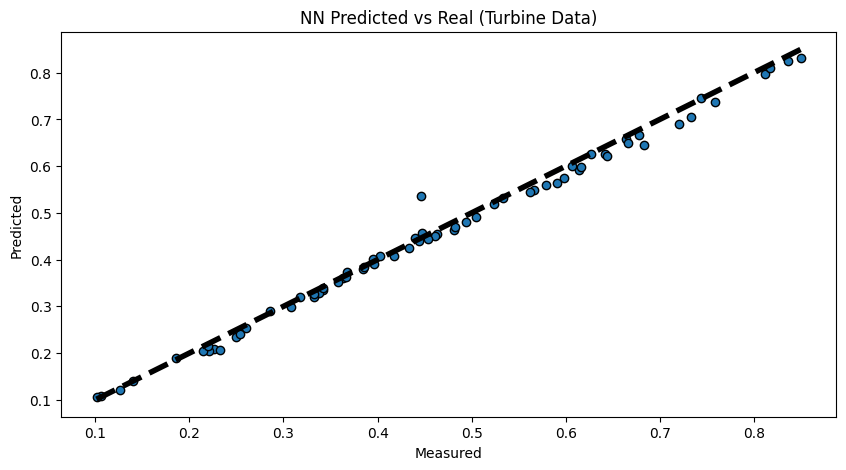

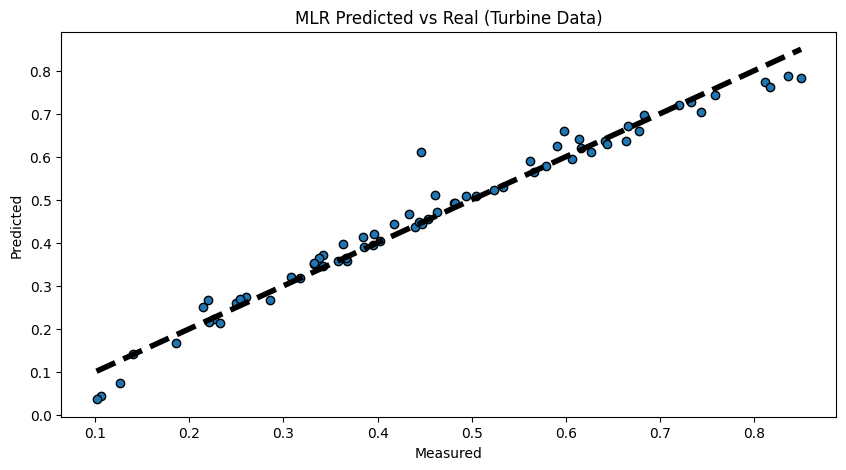

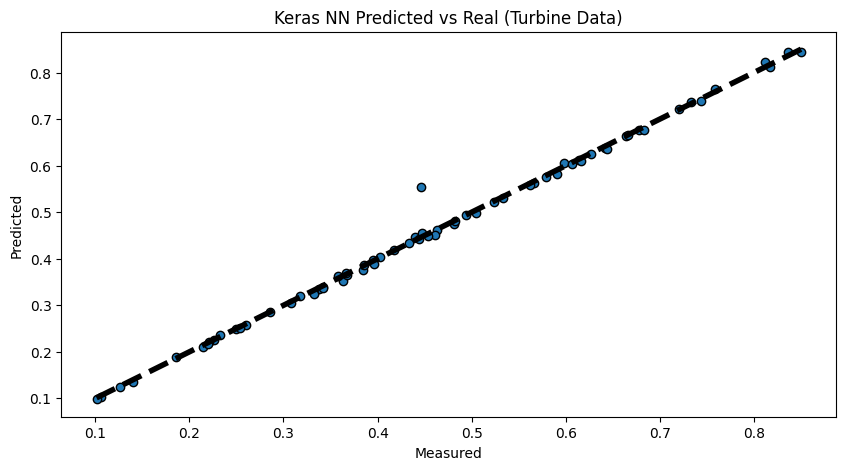

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Synthetic Data Results Comparison:
      Model      MAPE
0        NN  0.073649
1       MLR  0.065190
2  Keras NN  0.064395


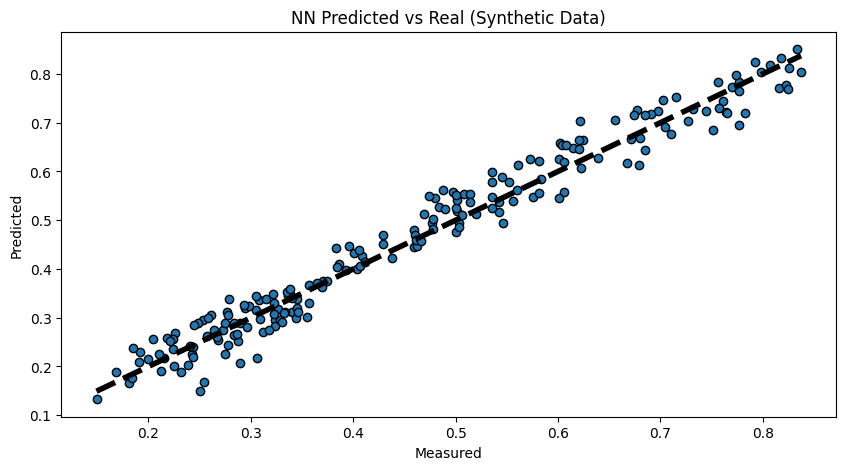

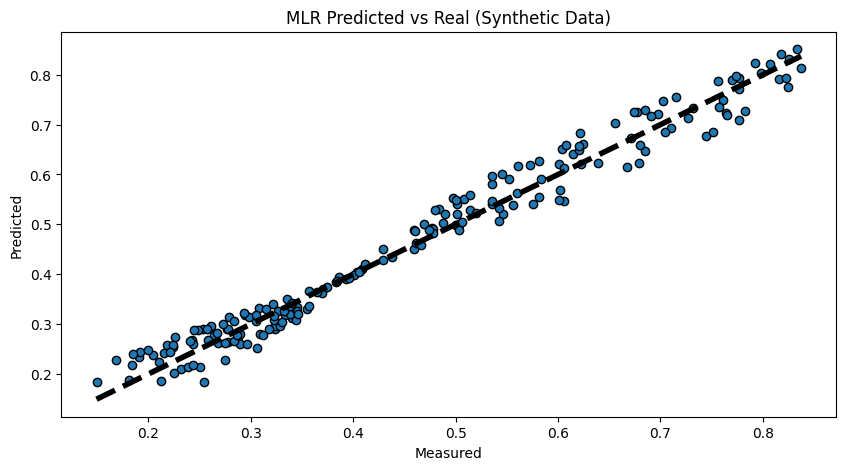

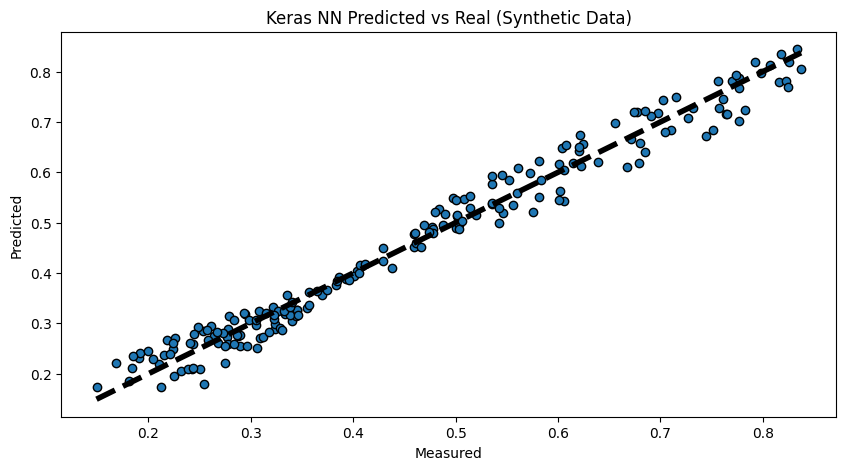

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Real Estate Data Results Comparison:
      Model      MAPE
0        NN  0.144764
1       MLR  0.142654
2  Keras NN  0.144705


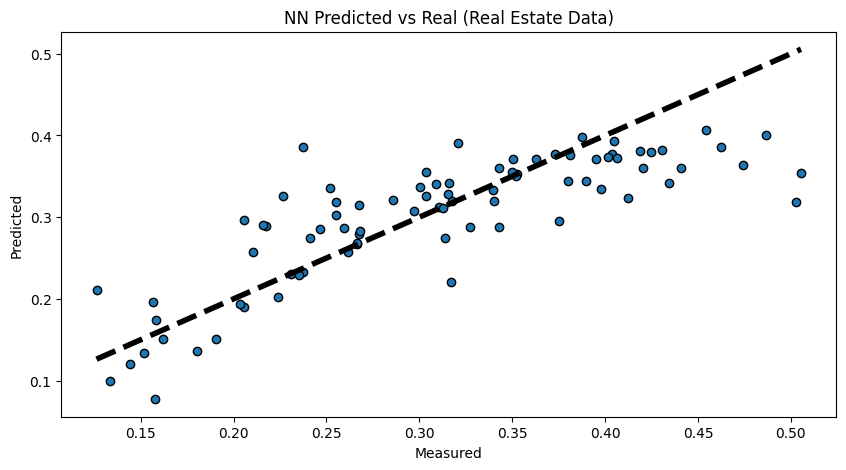

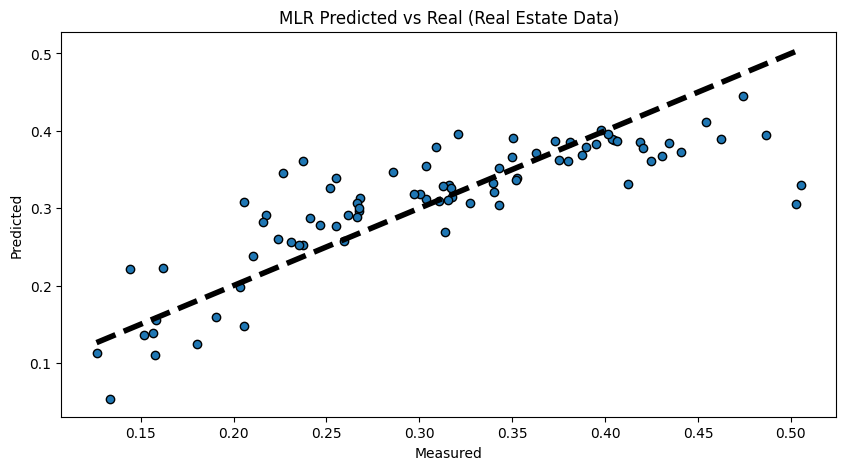

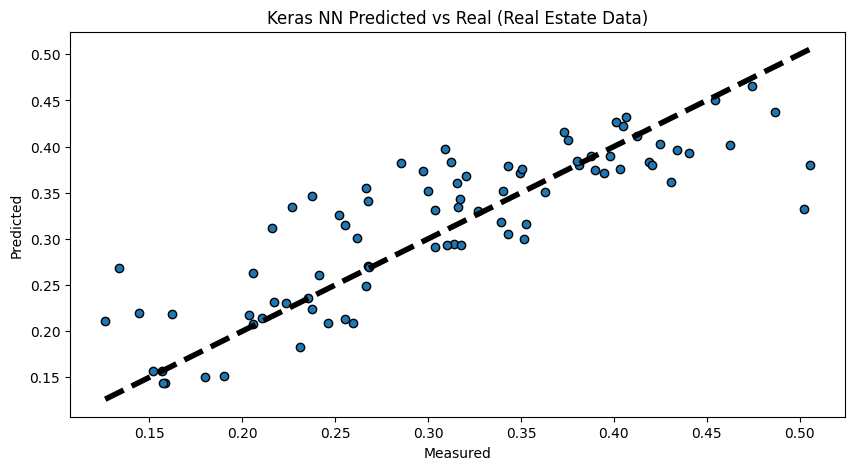

In [16]:
# Part 3.2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Load normalized datasets
turbine_data = pd.read_csv('turbine_data_normalized.csv')
synthetic_data = pd.read_csv('synthetic_data_normalized.csv')
real_estate_data = pd.read_csv('real_estate_data_normalized.csv')

def preprocess_data(data, target_column, test_size=0.2):
    X = data.drop(columns=[target_column])
    y = data[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, shuffle=True)
    return X_train, X_test, y_train, y_test

# Preprocess the data
X_train_turbine, X_test_turbine, y_train_turbine, y_test_turbine = preprocess_data(turbine_data, 'power_of_hydroelectrical_turbine', test_size=0.15)
X_train_synthetic, X_test_synthetic, y_train_synthetic, y_test_synthetic = preprocess_data(synthetic_data, 'z', test_size=0.2)
X_train_real, X_test_real, y_train_real, y_test_real = preprocess_data(real_estate_data, 'Y house price of unit area', test_size=0.2)

# Function to train and evaluate the neural network
def train_evaluate_nn(X_train, y_train, X_test, y_test, hidden_layer_sizes, learning_rate, momentum, activation, max_iter=200):
    model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, learning_rate_init=learning_rate, momentum=momentum, 
                         activation=activation, max_iter=max_iter, random_state=42, solver='adam')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    return model, y_pred, mape

# Function to train and evaluate multiple linear regression
def train_evaluate_mlr(X_train, y_train, X_test, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    return model, y_pred, mape

# Function to train and evaluate a neural network using Keras
def train_evaluate_nn_keras(X_train, y_train, X_test, y_test, layers, epochs=200, learning_rate=0.01):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    for units in layers:
        model.add(Dense(units, activation='relu'))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    y_pred = model.predict(X_test).flatten()
    mape = mean_absolute_percentage_error(y_test, y_pred)
    return model, y_pred, mape

# Function to plot results
def plot_results(y_test, y_pred, title):
    plt.figure(figsize=(10, 5))
    plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    plt.xlabel('Measured')
    plt.ylabel('Predicted')
    plt.title(title)
    plt.show()

# Best configurations based on the lowest MAPE (Have determined this from Part 3.1 above)
best_config_turbine = {'hidden_layer_sizes': (20, 20), 'learning_rate': 0.01, 'momentum': 0.9, 'activation': 'relu', 'max_iter': 200}
best_config_synthetic = {'hidden_layer_sizes': (10,), 'learning_rate': 0.01, 'momentum': 0.9, 'activation': 'relu', 'max_iter': 200}
best_config_real = {'hidden_layer_sizes': (10, 10), 'learning_rate': 0.01, 'momentum': 0.9, 'activation': 'tanh', 'max_iter': 200}

# Function to summarize best configurations and compare with other models
def summarize_and_compare(X_train, y_train, X_test, y_test, best_config, dataset_name):
    # Train and evaluate best NN configuration
    nn_model, nn_pred, nn_mape = train_evaluate_nn(X_train, y_train, X_test, y_test,
                                                   best_config['hidden_layer_sizes'], best_config['learning_rate'], 
                                                   best_config['momentum'], best_config['activation'], best_config['max_iter'])
    
    # Train and evaluate MLR model
    mlr_model, mlr_pred, mlr_mape = train_evaluate_mlr(X_train, y_train, X_test, y_test)
    
    # Train and evaluate Keras NN model
    layers = [units for units in best_config['hidden_layer_sizes']]
    keras_model, keras_pred, keras_mape = train_evaluate_nn_keras(X_train, y_train, X_test, y_test, layers)
    
    # Summarize results
    results = {
        'Model': ['NN', 'MLR', 'Keras NN'],
        'MAPE': [nn_mape, mlr_mape, keras_mape]
    }
    results_df = pd.DataFrame(results)
    
    # Print results
    print(f"{dataset_name} Data Results Comparison:")
    print(results_df)
    
    # Plot results
    plot_results(y_test, nn_pred, f'NN Predicted vs Real ({dataset_name} Data)')
    plot_results(y_test, mlr_pred, f'MLR Predicted vs Real ({dataset_name} Data)')
    plot_results(y_test, keras_pred, f'Keras NN Predicted vs Real ({dataset_name} Data)')

# Summarize and compare results for Turbine data
summarize_and_compare(X_train_turbine, y_train_turbine, X_test_turbine, y_test_turbine, best_config_turbine, 'Turbine')

# Summarize and compare results for Synthetic data
summarize_and_compare(X_train_synthetic, y_train_synthetic, X_test_synthetic, y_test_synthetic, best_config_synthetic, 'Synthetic')

# Summarize and compare results for Real Estate data
summarize_and_compare(X_train_real, y_train_real, X_test_real, y_test_real, best_config_real, 'Real Estate')
